# Técnicas de Segmentación 

# Clustering

# Santander Meteorology Group

## Estudiante: Nicolò Trevisani

## Abstract
Se presentan una serie de breves scripts de ejemplo que acompañan a la parte teórica en el aula sobre técnicas de agrupamiento.

### 1 Paquetes de R necesarios:

En la presente práctica consideraremos diferentes técnicas de agrupamiento, implementadas en diferentes librerías y paquetes de R, que necesitaremos instalar:

In [1]:
## Required packages:

#install.packages("MASS")
#install.packages("stats")
#install.packages("readr")
#install.packages("mclust")
#install.packages("caret")
#install.packages("e1071")
#install.packages("sparcl")
#install.packages("kohonen")
#install.packages("cluster")
#install.packages("FNN")

Tanto la función kmeans() como hclust(), utilizadas para el agrupamiento k-medias y jerárquico respectivamente, se encuentran por defecto listas para ser utilizadas, ya que pertenecen al paquete básico stats. A pesar de que principalmente utilizaremos estas técnicas, también utilizaremos otras librerías que nos permitan experimentar con otras metodologías o utilizar otras funcionalidades de interés. Adicionalmente, podría ser interesante (aunque no imprescindible) la utilización del paquete sparcl, que permite colorear las observaciones contenidas en un dendrograma de forma fácil en función de su grupo de pertenencia, para niveles diferentes de corte.

Como siempre:

In [2]:
## Statistical tools:

library(MASS)
library(stats)

## Reading data:

library(readr)

## Clustering methods:
library(mclust)
library(caret)
library(e1071)
library(sparcl)
#library(kohonen)
library(cluster)
library(FNN)

Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: lattice

Loading required package: ggplot2



El paquete magrittr se utilizará por conveniencia, al incorporar (entre otros) el operador %>% que permite concatenar acciones de manera sencilla.

In [3]:
require(magrittr)

Loading required package: magrittr



# 2 Introducción teórica a los algoritmos de agrupamiento
## 2.1 Las técnicas de agrupamiento

Las técnicas de agrupamiento, o clustering, consisten en encontrar subgrupos dentro de un conjunto de observaciones dado. El objetivo es encontrar subconjuntos de observaciones que tienen un parecido mayor entre sí respecto a las observaciones pertenecientes a otros subgrupos. Para ello, es preciuso definir alguna medida de similitud, lo que a menudo viene dado por el problema específico que se quiere resolver.

Este tipo de problemas de agrupamiento pertenecen al dominio del aprendizaje no supervisado, en el que intentamos descubrir una estructura subyacente en los datos (recuerda que en el aprendizaje supervisado intentábamos predecir alguna variable entrenando con un conjunto de datos cuyo resultado conocíamos previamente).

Tanto el Análisis de Componentes Principales (PCA) como las técnicas de agrupamiento tienen como objeto la simplificación de los datos a través de alguna forma de síntesis, pero operan de maneras diferentes:

- El PCA tiene como objetivo la reducción de la dimensionalidad del espacio de las observaciones recogiendo una buena parte de la varianza.
- Las técnicas de agrupamiento buscan subgrupos de observaciones homogéneos dentro del conjunto de las observaciones.

Las técnicas de clustering se aplican en multitud de dominios de análisis, y por lo tanto existe una gran variedad de ellas aplicadas a campos específicos. En este caso, vamos a ver dos de las técnicas más populares representaticas de las dos familias principales, basadas en centroides o jerárquica:

- El algoritmo k-medias pertenece a la familia de las técnicas de agrupamiento no-divisivas y basadas en centroides. En el algoritmo k-medias conocemos de antemano el número de grupos que queremos obtener.
- El algoritmo de agrupamiento jerárquico pertenece a la familia de las técnicas divisivas. En este caso desconocemos de antemano el número de grupos deseado. Lo que obtenemos es un diagrama con estructura de árbol, o dendrograma que permite visualizar en un solo diagrama el agrupamiento obtenido para cada número posible de grupos, desde 1 hasta n.

Cada método tiene ventajas e inconvenientes que mostraremos a continuación.

## 2.1.1 Agrupamiento k-medias:

El algoritmo k-medias es un método sencillo para dividir un set de datos en K
grupos sin intersecciones, dado previamente el número de grupos (K) que queremos generar.

Para explicar el mecanismo, sencillo e intuitivo, mediante el que opera K-medias, sean C1
,… ,CK
conjuntos que contienen los índices de las observaciones pertenecientes a cada cluster. Estos satisfacen dos propiedades:

-    todas las observaciones pertenecen al menos a un cluster.
-    los clusters nunca se solapan: ninguna observación puede pertencer a más de un cluster.

La idea detrás de K-medias es que un agrupamiento es bueno cuando la variabilidad intra-grupos es lo más pequeña posible. Por otra parte, la variabilidad entre-grupos Ck
es una medida W(Ck) 
de cuánto difieren las observaciones pertenecientes a un grupo de las de otro. Por tanto, se petende resolver el problema:

C1,…,Ckminimize{∑k=1KW(Ck)}

Dicho de otro modo, la ecuación dice que queremos dividir las observaciones en K
grupos (clusters) de modo que se minimice la suma total de la variabilidad en cada cluster. Para resolver (), debemos definir una medida de dicha variabilidad. Hay muchas métricas para esto, pero con ucha diferencia la más comúnmente utilizada es el cuadrado de la distancia Euclídea. Es decir, definimos lo siguiente:

W(Ck)=1|Ck|∑i,i′∈Ck∑j=1p(xij−xi′j)2,

donde |Ck|

denota el número de observaciones en el cluster k-ésimo. Por tanto, la variabilidad intra-cluster es la suma de todas las distancias Euclídeas entre todos los pares de observaciones dentro de ese cluster, dividido por el número total de observaciones dentro de ese cluster. La combinación de las ecuaciones () y () enuncia el problema de optimización que debe resolver el algoritmo K-medias:

C1,…,Ckminimize{∑k=1K1|Ck|∑i,i′∈Ck∑j=1p(xij−xi′j)2}.

Ahora se trata de encontrar un algoritmo capaz de resolver () –es decir, que divida las observaciones en K
grupos que minimicen la variabilidad intra-grupo–. Se trata de un problema difícil de resolver ya que potencialmente da lugar a un número demasiado alto de posibles agrupamientos de n observaciones en K clusters (Kn). Existe no obstante un algoritmo sencillo capaz de encontrar un óptimo local (digamos una solución ``bastante buena’’) al problema de optimización expuesto en (). A continuación presentamos dicho algoritmo:

    Primero se asigna un número aleatorio, de 1 a K

, a cada una de las observaciones. Este es el cluster de pertenencia inicial de cada observación.
Se procede iterando hasta que la pertenencia de cada observación al cluster deja de cambiar:
Para cada uno de los K

    clusters, se calcula su `centroide}.
    Asigna a cada observación al cluster cuyo centroide está más próximo (esta proximidad se determina en este caso mediante la distancia Euclídea)

Este algoritmo garantiza la reducción de la distancia intra-grupos en cada iteración, hasta alcanzar un óptimo local. Su nombre (K-medias) viene dado por el hecho de que en el paso 2(a) expuesto anteriormente, los centroides se calculan como la media de las observaciones en ese cluster.

Dado que la solución del algoritmo K-medias es un óptimo local (no global), los resultados obtenidos dependen de la condición inicial (la primera asignación aleatoria de cluster a las observaciones, paso 1), es importante ejecutarlo varias veces con diferentes inicializaciones para asegurar un buen agrupamiento. Esto queda reflejado en la figura .

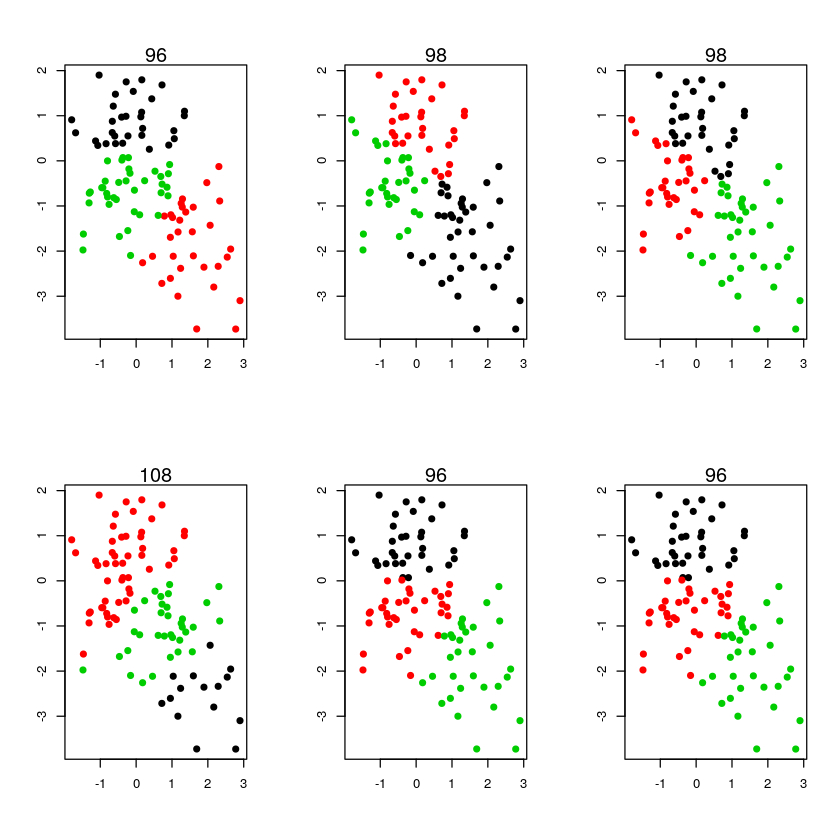

In [4]:
# GENERA FIGURA 1
set.seed(4)
x <- matrix(rnorm(100 * 2), ncol = 2)
x[1:25, 1] <- x[1:25, 1] + 1
x[1:25, 2] <- x[1:25, 2] - 2
k <- 3
par(mfrow = c(2,3))
j = 6
while(j > 0) {
      j <- j - 1
      set.seed(j+1)
      km <- kmeans(x, centers = k)
      plot(x, ty = "n", xlab = "", ylab = "")
      for (i in 1:k) {
            points(x[km$cluster == i, ], pch = 19, col = i)
      }
      mtext(format(km$tot.withinss, digits = 2)) 
}

## 2.1.2 Agrupamiento jerárquico:

A diferencia de K-medias, las técnicas de agrupamiento jerárquico no requieren un número predefinido de grupos, lo cual es una ventaja en muchas ocasiones. Además, produce una estructura de tipo árbol para representar el agrupamiento de los datos llamado dendrograma.

A continuación describimos el tipo más común de clustering jerárquico, conocido como de abajo hacia arriba o aglomerativo, en referencia al hecho de que normalmente se representa como un árbol boca-abajo, que comienza a elaborarse por las hojas y va combinando clusters para formar ramas de forma progresiva hasta llegar a un tronco común.

## 2.1.2.1 El dendrograma:

En esta sección utilizaremos el ejemplo mostrado en la figura , donde hay 45 observaciones que pertencen a grupos bien diferenciados. El clustering jerárquico (usando el método complete linkage, que veremos a continuación) prodice el resultado mostrado en la figura . ¿Cómo interpretamos el dendrograma?

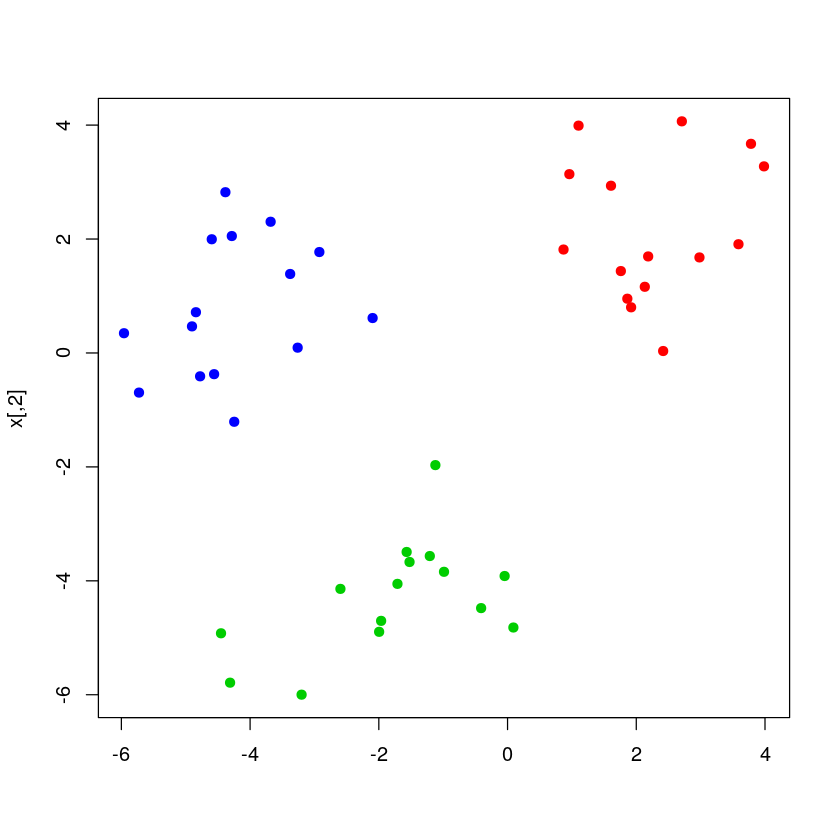

In [5]:
# GENERA FIGURA 2
set.seed(2)
x <- matrix(rnorm(45 * 2), ncol = 2)
x[1:15, 1] <- x[1:15, 1] + 2
x[1:15, 2] <- x[1:15, 2] + 2
x[16:30, 2] <- x[16:30, 2] - 4
x[16:30, 1] <- x[16:30, 1] - 2
x[31:45, 1] <- x[31:45, 1] - 4
x[31:45, 2] <- x[31:45, 2] + 1 
plot(x, ty = "n", xlab = "")
points(x[1:15, ], col = 2, pch = 19)
points(x[16:30, ], col = 3, pch = 19)
points(x[31:45, ], col = 4, pch = 19)

En el dendrograma de la figura están representados los datos de la figura , pero coloreados para diferentes niveles de agrupamiento. Los extremos inferiores (las hojas) corresponden a cada una de las observaciones. A medida que ascendemos por el árbol, algunas hojas comienzan a unirse para dar lugar a ramas. Estas observaciones son las más similares entre sí. A medida que nos movemos hacia arriba en el árbol, las ramas se van uniendo entre sí o con otras hojas. Cuanto antes se unen, más similitud hay entre los grupos de observaciones. Por el contrario, cuanto más lejana es la unión entre ramas, más alejados se encuentran entre sí los grupos de observaciones. La altura de estas uniones, medida en el eje vertical del dendrograma, mide la diferencia entre dos observaciones.

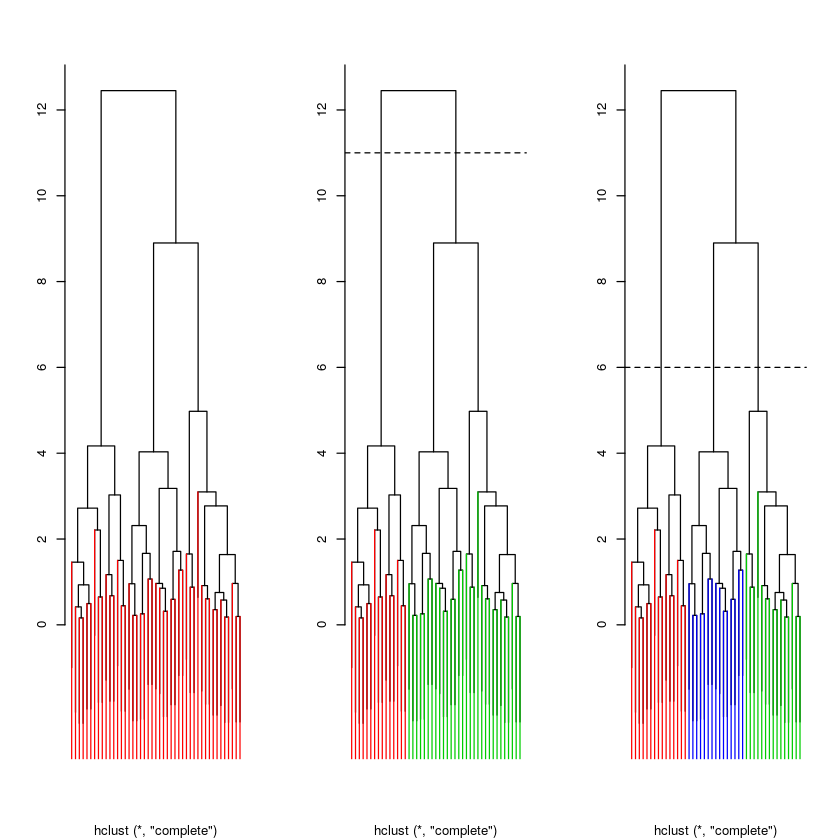

In [6]:
# GENERA FIGURA 3
require(sparcl) # colorea las hojas del dendrograma de forma facil
hc <- hclust(dist(x), method = "complete")
par(mfrow=c(1,3))
y1 <- cutree(hc, k = 1)
ColorDendrogram(hc, y = y1, ylab = "", xlab = "", branchlength = 10)
y2 <- cutree(hc, h = 11)
ColorDendrogram(hc, y = y2, ylab = "", xlab = "", branchlength = 10)
abline(h = 11, lty = 2)
y3 <- cutree(hc, h = 6)
ColorDendrogram(hc, y = y3, ylab = "", xlab = "", branchlength = 10)
abline(h = 6, lty = 2)

NOTA: No pueden extraerse conclusiones sobre la similitud entre dos observaciones por su posición en el eje horizontal. Por el contrario, debemos observar la primera unión de ambas observaciones y su punto de corte con el eje vertical. A modo de ejemplo, se presenta la figura : Los pares de observaciones (9,8) y (2,7) son muy similares entre sí (la distancia euclídea que los separa es pequeña, como puede verse en el plot de la izquierda). Sin embargo, la distancia entre (4,3) es considerable, y sin embargo aparecen seguidos en el eje horizontal. Puede comprobarse que su punto de unión en el eje vertical es el más alejado (>4). 

Por el contrario, las observaciones 1 y 7, alejadas entre sí en el eje horizontal, son mucho más próximas, cortando el eje vertical en un valor próximo a 2.

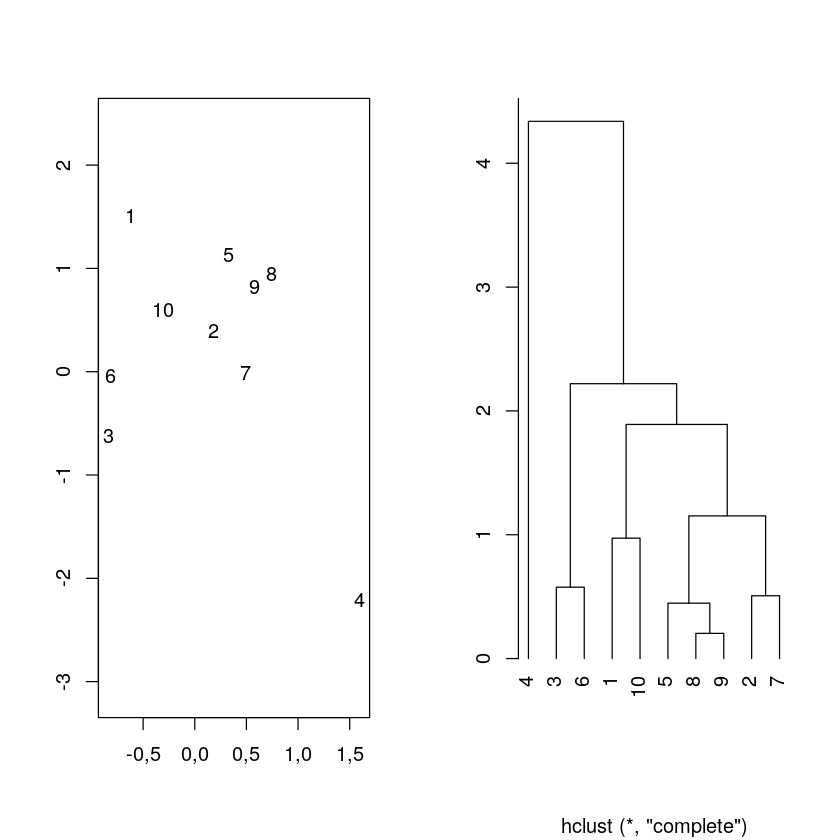

In [7]:
# GENERA FIGURA 4
set.seed(1)
x <- matrix(rnorm(20), ncol = 2)
hc <- hclust(dist(x))
par(mfrow = c(1,2))
plot(x, ty = "n", xlab = "", ylab = "", asp = 1)
text(x[hc$order,1], x[hc$order,2], hc$order)
plot(hc, xlab = "", ylab = "", main = "", hang = -1)

### 2.1.2.2 Identificación de grupos:

Ahora que podemos interpretar un dendrograma, pasamos a analizar la identificación de los grupos que se han generado. Para ello, hacemos un corte horizontal en un punto dado del eje vertical, tal y como se indica con una línea punteada en los paneles central y derecho de la figura . Los grupos de observaciones definidos bajo la línea de corte son los clusters resultantes. Como se ve en la figura , en el panel central, al trazar un corte a la altura de 11 generamos dos clusters diferentes. A medida que descendemos, el número de clusters aumenta. En el panel derecho, vemos que para un nivel de corte de 6 obtenemos 3 clusters. Descendiendo, se obtienen progresivamente más grupos, hasta llegar a tantos grupos como observaciones para un nivel de corte de 0. Por tanto, la altura de corte sirve para definir el número de grupos, tal y como el parámetro K
hacía en la técnica de las K-medias.

En la práctica, normalmente el número de grupos se suele seleccionar por inspección visual del dendrograma, buscándose un número de grupos razonable en función de las diferentes alturas y el número de clusters que se quiera obtener. No obstante, como se ve un único dendrograma puede servir para seleccionar distinto número de grupos. En el caso de la figura , el nivel de corte para obtener tres grupos parece el más razonable, sobretodo si tenemos en cuenta los datos de partida representados en la figura . Sin embargo, a veces la selección del número de grupos no es tan obvia. En este sentido, si tenemos un conocimiento a priori del tipo de grupos que podríamos encontrar, el agrupamiento jerárquico podría no ser la mejor opción.

### 2.1.2.3 Algoritmo:

El dendrograma se obtienen mediante un algortimo muy sencillo. Se comienza por definir algún tipo de medida de distancia entre cada par de observaciones (típicamente la distancia Euclídea, aunque hay muchas otras, help("dist")). Se comienza desde la base del árbol, donde cada observación es tratada como un cluster independiente. A partir de ahí, de forma iterativa, se van uniendo los clusters más cercanos entre sí hasta llegar a un único cluster que engloba a todas las observaciones, momento en el que el dendrograma se completa y se para. Esto queda reflejado, para las 6 primeras iteraciones, en la figura , que se corresponde con los datos mostrados anteriormente en el dendrograma de la figura .

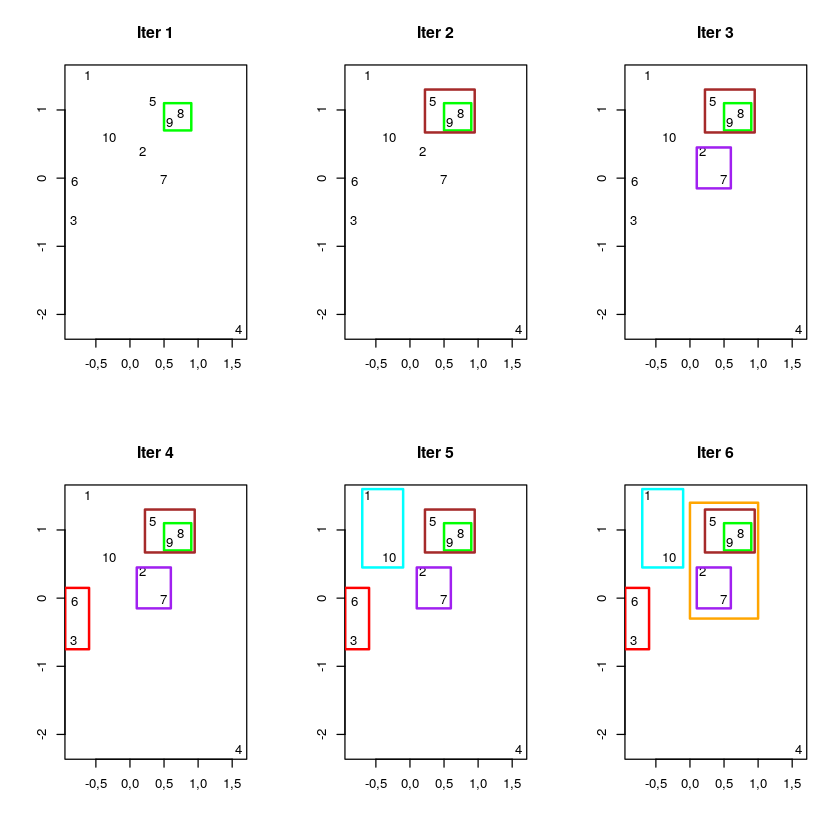

In [8]:
set.seed(1)
x <- matrix(rnorm(20), ncol = 2)
hc <- hclust(dist(x))
par(mfrow = c(2,3))
# plot(x, ty = "n", xlab = "", ylab = "", asp = 1, main = "Iter 1")
# text(x[hc$order,1], x[hc$order,2], hc$order)
plot(x, ty = "n", xlab = "", ylab = "", asp = 1, main = "Iter 1")
text(x[hc$order,1], x[hc$order,2], hc$order)
rect(0.5,0.7,0.9,1.1, border = "green", lwd = 2)

plot(x, ty = "n", xlab = "", ylab = "", asp = 1, main = "Iter 2")
text(x[hc$order,1], x[hc$order,2], hc$order)
rect(0.5,0.7,0.9,1.1, border = "green", lwd = 2)
rect(0.22,0.67,0.95,1.3, border = "brown", lwd = 2)

plot(x, ty = "n", xlab = "", ylab = "", asp = 1, main = "Iter 3")
text(x[hc$order,1], x[hc$order,2], hc$order)
rect(0.5,0.7,0.9,1.1, border = "green", lwd = 2)
rect(0.22,0.67,0.95,1.3, border = "brown", lwd = 2)
rect(0.1,-0.15,0.6,0.45, border = "purple", lwd = 2)

plot(x, ty = "n", xlab = "", ylab = "", asp = 1, main = "Iter 4")
text(x[hc$order,1], x[hc$order,2], hc$order)
rect(0.5,0.7,0.9,1.1, border = "green", lwd = 2)
rect(0.22,0.67,0.95,1.3, border = "brown", lwd = 2)
rect(0.1,-0.15,0.6,0.45, border = "purple", lwd = 2)
rect(-0.95,-0.75,-0.6,0.15, border = "red", lwd = 2)

plot(x, ty = "n", xlab = "", ylab = "", asp = 1, main = "Iter 5")
text(x[hc$order,1], x[hc$order,2], hc$order)
rect(0.5,0.7,0.9,1.1, border = "green", lwd = 2)
rect(0.22,0.67,0.95,1.3, border = "brown", lwd = 2)
rect(0.1,-0.15,0.6,0.45, border = "purple", lwd = 2)
rect(-0.95,-0.75,-0.6,0.15, border = "red", lwd = 2)
rect(-0.7,0.45,-0.1,1.6, border = "cyan", lwd = 2)

plot(x, ty = "n", xlab = "", ylab = "", asp = 1, main = "Iter 6")
text(x[hc$order,1], x[hc$order,2], hc$order)
rect(0.5,0.7,0.9,1.1, border = "green", lwd = 2)
rect(0.22,0.67,0.95,1.3, border = "brown", lwd = 2)
rect(0.1,-0.15,0.6,0.45, border = "purple", lwd = 2)
rect(-0.95,-0.75,-0.6,0.15, border = "red", lwd = 2)
rect(-0.7,0.45,-0.1,1.6, border = "cyan", lwd = 2)
rect(0,-0.3,1,1.4, border = "orange", lwd = 2)

Algoritmo de agrupamiento jerárquico:

- Se comienza con un set de n observaciones y una medida de distancia (p.ej. la distancia euclídea) entre cada par (n2)=n(n−1)2 de disimilitudes. Cada observación es un cluster.
- Para i=n,n−1,…,2:
- Se examinan todas las disimilitudes entre los i
clusters y se identifica el par de clusters cuya disimilitud es menor (es decir, más cercanos). Se unen ambos. La disimilitud entre ambos indica la altura en el eje vertical del dendrograma, a la cual se sitúa el punto de unión entre ambos grupos.
- Se calcula las nuevas disimilitudes entre pares de observaciones intra-cluster para los n−1 clusters restantes.

Uniones entre clusters:

Como se ve, el algoritmo es sencillo, aunque falta por definir con más claridad cómo definir las uniones. Entre pares de observaciones sueltas está claro que la disimilitud se mide en función de la distancia entre ellas, pero ¿cómo definir la disimilitud entre dos clusters cuando uno de ellos o ambos contienen varias observaciones? (p. ej., el paso 2 o el paso 6 reflejados en la figura ). Hay varios métodos de unión (en inglés linkage), algunos de los cuales (los principales) están resumidos brevemente en la tabla . Los más populares en análisis estadístico son del tipo completa (esta es la opción por defecto en la función de R hclust, {complete}), promedio (average) y única (single). Media y completa tienden a producir dendrogramas más equilibrados. Las disimilitudes calculadas en el paso (2b) por el algoritmo (cuadro ) dependen directamente del tipo de unión seleccionado (figura ) así como de la medida de disimilitud, afectando de manera muy importante al dendrograma resultante. En general, es importante seleccionar la medida de distancia en función de los datos analizados y el tipo de respuesta que se pretende obtener. En ocasiones, puede ser preferible obtener medidas de disimilitud basadas en correlación entre observaciones en lugar de su distancia.

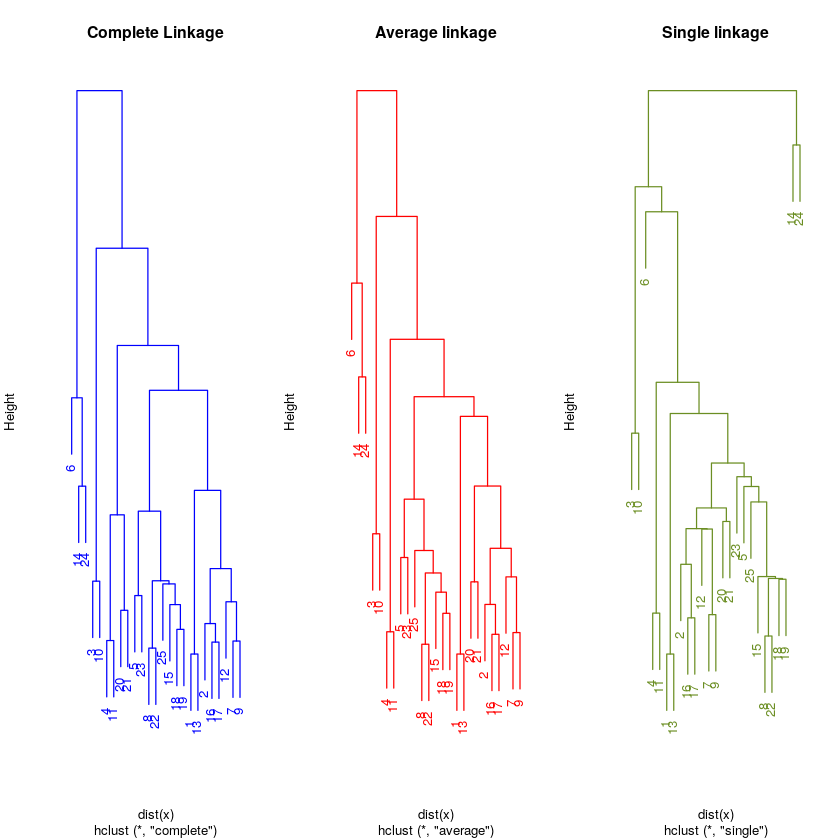

In [9]:
# GENERA FIGURA 6
set.seed(1)
x <- matrix(rnorm(50), ncol = 2)
par(mfrow=c(1,3))
plot(hclust(dist(x), method = "complete"), col = "blue", axes = FALSE,
     main = "Complete Linkage")
plot(hclust(dist(x), method = "average"), col = "red", axes = FALSE,
     main = "Average linkage")
plot(hclust(dist(x), method = "single"), col = "olivedrab", axes = FALSE,
     main = "Single linkage")

# 3 Comentarios finales sobre las técnicas de agrupamiento y su aplicación práctica:

Aunque las técnicas de agrupamiento pueden resultar extremadamente útiles en el campo del aprendizaje no supervisado, deben tenerse en cuenta varios aspectos prácticos para su uso adecuado.

Algunas decisiones importantes que deben realizarse:

-    ¿Debemos estandarizar los datos de alguna manera antes de comenzar con el agrupamiento?
-    En el caso del agrupamiento jerárquico:
    -    ¿Qué medida de distancia debemos escoger?
    -    ¿Qué tipo de unión aplicar?
    -    ¿Qué punto de corte seleccionar para determinar el número de grupos resultante?
-    En el caso del agrupamiento K-medias, ¿cuántos grupos fijar?

Todas estas decisiones tienen una repercusión importante en los resultados finales. En la práctica, no suele haber una única opción válida sino varias. Normalmente se buscan referencias previas en la literatura o bien se realizan diversas pruebas hasta dar con un resultado razonable y fácilmente interpretable.

Siempre que apliquemos una técnica de clustering obtendremos un agrupamiento determinado de los datos. Por ejemplo, en la figura hemos utilizado números generados de forma aleatoria sobre una distribución normal, lo cual desde un punto de vista práctico no tiene mucho sentido intentar agrupar. Del mismo modo, la presencia de extremos, u observaciones fuera de rango, puede distorsionar en gran medida la configuración de los grupos generados. Además, los métodos de agrupamiento en general son bastante sensibles a perturbaciones de los datos de entrada, por lo que modificaciones pequeñas en el set de observaciones puede dar lugar a cambios importantes en la asignación de los grupos.

# 4 Aplicación práctica con R

## 4.1 Introducción a la práctica

En esta práctica ilustraremos de forma básica la implementación en R de las técnicas de agrupamiento k-medias y jerárquica. En la primera parte del guión ya has podido ver el código utilizado para generar las figuras. Ahora se trata de practicar este código y ver algún detalle más que puede ser interesante.

## 4.2 Clustering con k-medias

El paquete stats, que se encuentra contenido en la instalación básica de R y cargado por defecto en la sesión de trabajo, contiene la función k-means que implementa el algoritmo k-medias.

In [10]:
# ? kmeans

Para comenzar a ilustrar su funcionamiento, vamos a considerar el dataset Iris que ya hemos utilizado anteriormente, en el que hay una clase separable y otras dos no separables:

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5,1 4,9 4,7 4,6 5,0 5,4 4,6 5,0 4,4 4,9 ...
 $ Sepal.Width : num  3,5 3,0 3,2 3,1 3,6 3,9 3,4 3,4 2,9 3,1 ...
 $ Petal.Length: num  1,4 1,4 1,3 1,5 1,4 1,7 1,4 1,5 1,4 1,5 ...
 $ Petal.Width : num  0,2 0,2 0,2 0,2 0,2 0,4 0,3 0,2 0,2 0,1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


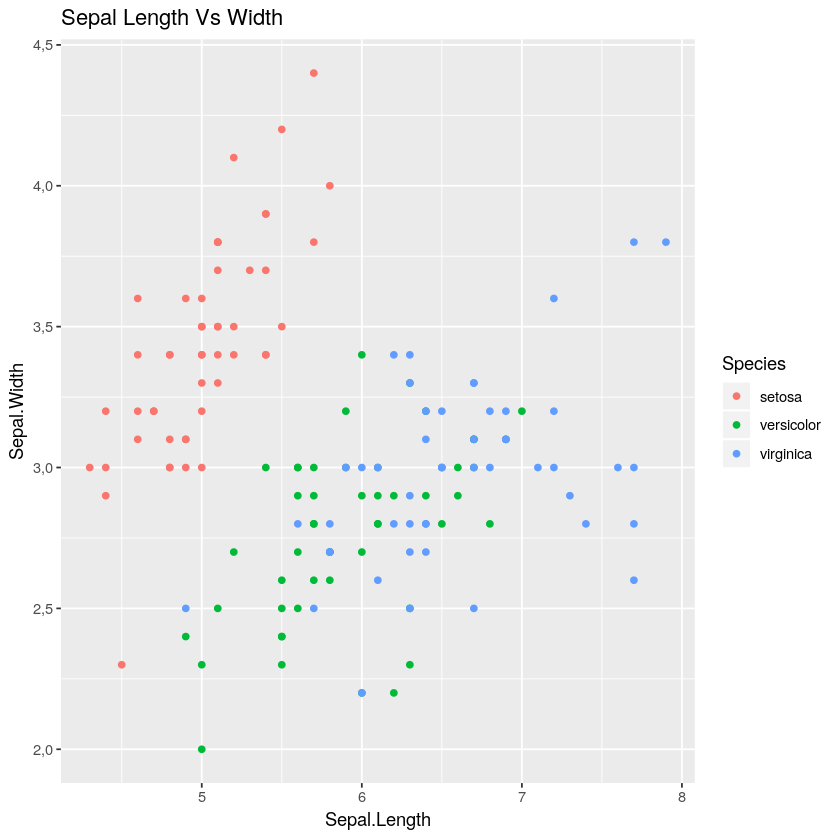

In [11]:
str(iris)
library(ggplot2)
ggplot( data = iris, 
  aes(x = Sepal.Length,y = Sepal.Width)) +  
  geom_point(aes(color= Species)) +
  ggtitle("Sepal Length Vs Width")

A continuación realizamos el clustering usando kmeans, indicando que deseamos tener tres grupos diferentes (argumento centers = 3):

             Length Class  Mode   
cluster      150    -none- numeric
centers       12    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

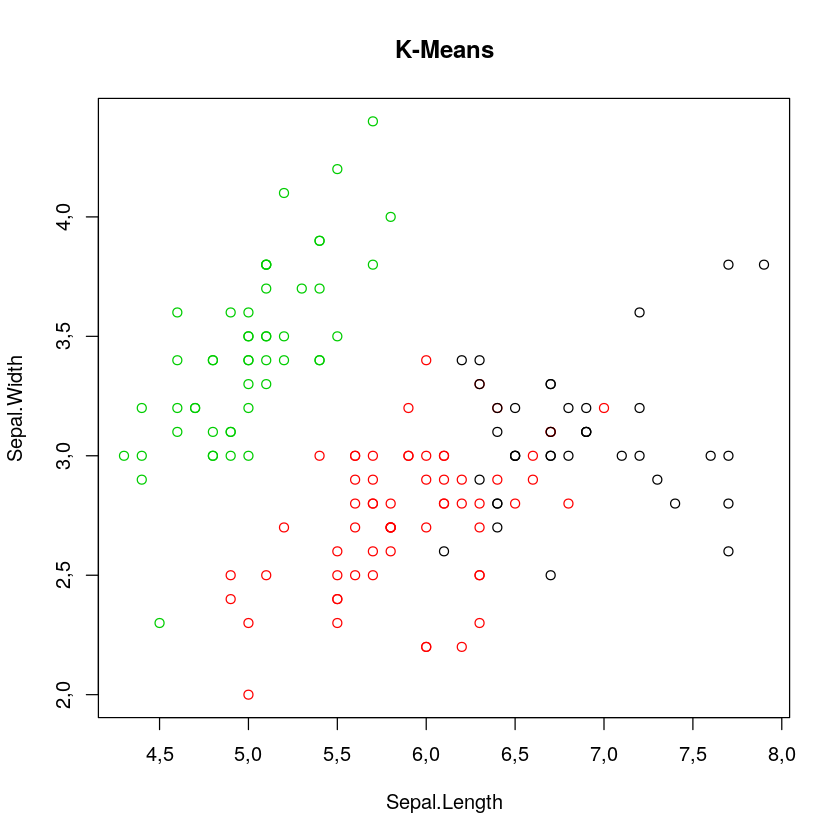

In [12]:
kmModel<-kmeans(iris[,-5],3,nstart=1)
summary(kmModel)

## Point center of two attributes
plot(iris[,c(1,2)],col=kmModel$cluster,main="K-Means")

La pertenencia de cada observación a los clusters indicados está contenida en el elemento cluster del objeto de salida, así como las distancias inter- e intra-grupo:

In [13]:
kmModel$cluster
kmModel$withinss ## Vector of within-cluster sum of squares, one component per cluster (mejor pequeñas)
kmModel$betweenss ## The between-cluster sum of squares (mejor grande)

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2

[1] 23,87947 39,82097 15,15100

[1] 602,5192

Dado que en este caso tenemos las clases, podemos evaluar los grupos obtenidos:

In [14]:
confusionMatrix(as.factor(as.numeric(iris[,5])),as.factor(kmModel$cluster))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1  0  0 50
         2  2 48  0
         3 36 14  0

Overall Statistics
                                         
               Accuracy : 0,32           
                 95% CI : (0,2463, 0,401)
    No Information Rate : 0,4133         
    P-Value [Acc > NIR] : 0,9925521      
                                         
                  Kappa : -0,02          
                                         
 Mcnemar's Test P-Value : 0,0003852      

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0,0000   0,7742   0,0000
Specificity            0,5536   0,9773   0,5000
Pos Pred Value         0,0000   0,9600   0,0000
Neg Pred Value         0,6200   0,8600   0,5000
Prevalence             0,2533   0,4133   0,3333
Detection Rate         0,0000   0,3200   0,0000
Detection Prevalence   0,3333   0,3333   0,3333
Balanced Accuracy      0,2768   0,8757   0,2500

Notar que la evaluación del clustering depende de la interpretación de las etiquetas obtenidas y su correspondencia con las clases originales. Por otra parte, la inicialización aleatoria de los centroides da lugar a diferentes agrupaciones y correspondencias:

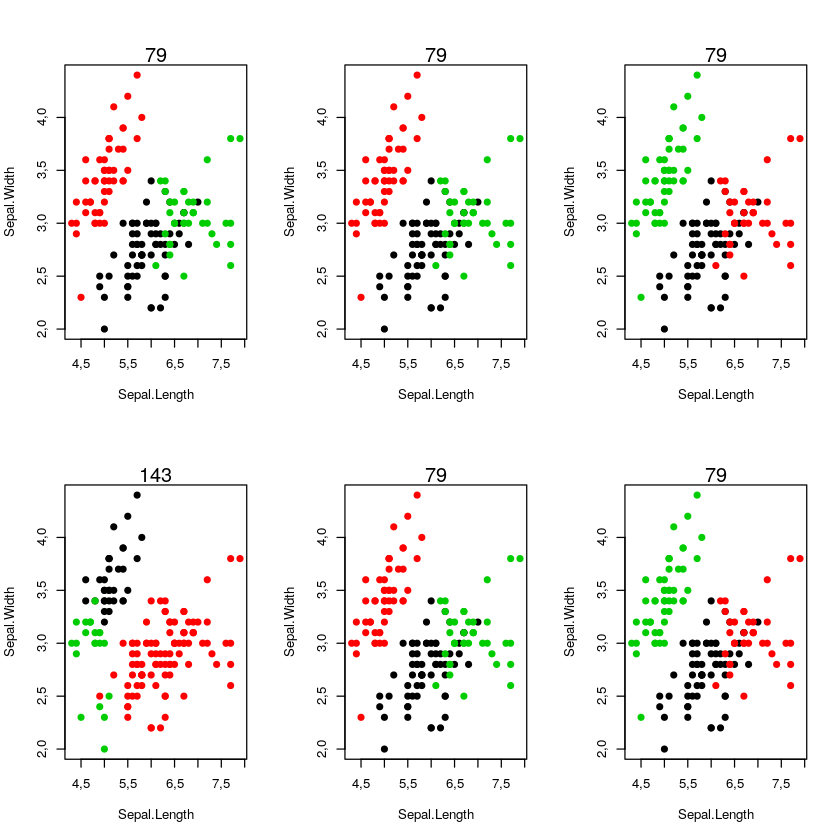

In [15]:
k<-3
par(mfrow=c(2,3))
j<-6
while(j>0){
  set.seed(j)
  j<-j-1
  km<-kmeans(iris[,-5],centers=k)
  plot(iris[,c(1,2)],type="n")
  for(i in 1:k){
    points(iris[km$cluster==i,c(1,2)],pch=19,col=i)
  }
  mtext(format(km$tot.withinss,digits=2))
}

El elemento 

In [16]:
km$tot.withinss 

[1] 78,85144

es la suma de cuadrados total de la variación intra-cluster, que es precisamente la que se intenta minimizar a través del algoritmo k-medias. Las sumas de cuadrados individuales para cada cluster están almacenadas en 

In [17]:
km$withinss

[1] 39,82097 23,87947 15,15100

Es recomendable hacer uso del argumento nstart siempre, y con un valor suficientemente alto (digamos 20 - 50), para que el algoritmo se ejecute varias veces y asegurar que no nos quedamos atrapados en un óptimo local que no proporcione una separación óptima de los grupos. Además, es importante el uso de set.seed(), de modo que se asegura que la asignación aleatoria de clusters en el paso 1 del algoritmo puede replicarse, y su resultado sea perfectamente reproducible.

Como vemos, el algoritmo es capaz de realizar la separación de la clase linealmente separable pero tiene dificultades, como era de esperar, al separar los otros grupos.

En el ejemplo anterior sabíamos de antemano que los datos estaban agrupados en tres clusters. Sin embargo, en aplicaciones reales, normalmente desconocemos el número de grupos subyacente por lo que en ocasiones debemos probar varias combinaciones y evaluar, en base a algún parámetro del modelo, que k es óptimo.

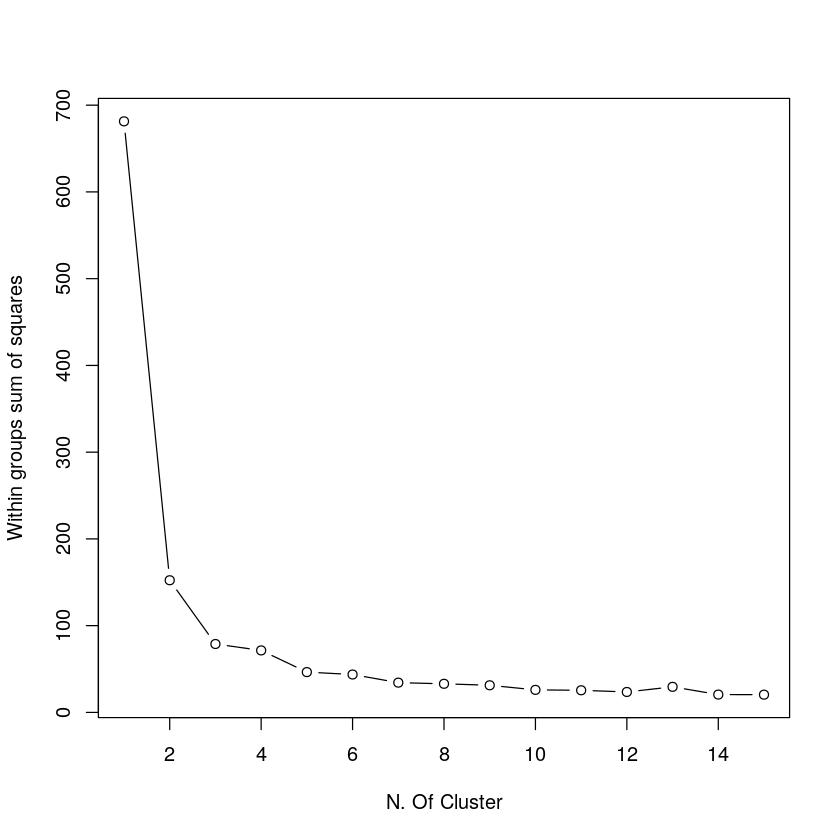

In [18]:
## How many clusters should we use?
totWithinss<-c(1:15)
for(i in 1:15){
  kmModel<-kmeans(iris[,-5],centers=i,nstart=1)
  totWithinss[i]<-kmModel$tot.withinss
}
plot(x=1:15,y=totWithinss,type="b",
  xlab="N. Of Cluster",ylab="Within groups sum of squares")

### 4.2.1 MNIST data set from kaggle

En algunos casos, tenemos un conocimiento previo del número de clases que queremos identificar. En estos casos, ¿es posible utilizar un método de clustering como un método de clasificación? Esta pregunta es la que trataremos de responder en esta práctica. Para ello, aplicaremos un algoritmo de clustering al dataset MNIST, ya descrito en prácticas anteriores y analizamos si es capaz de separar correctamente los diferentes números:

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.



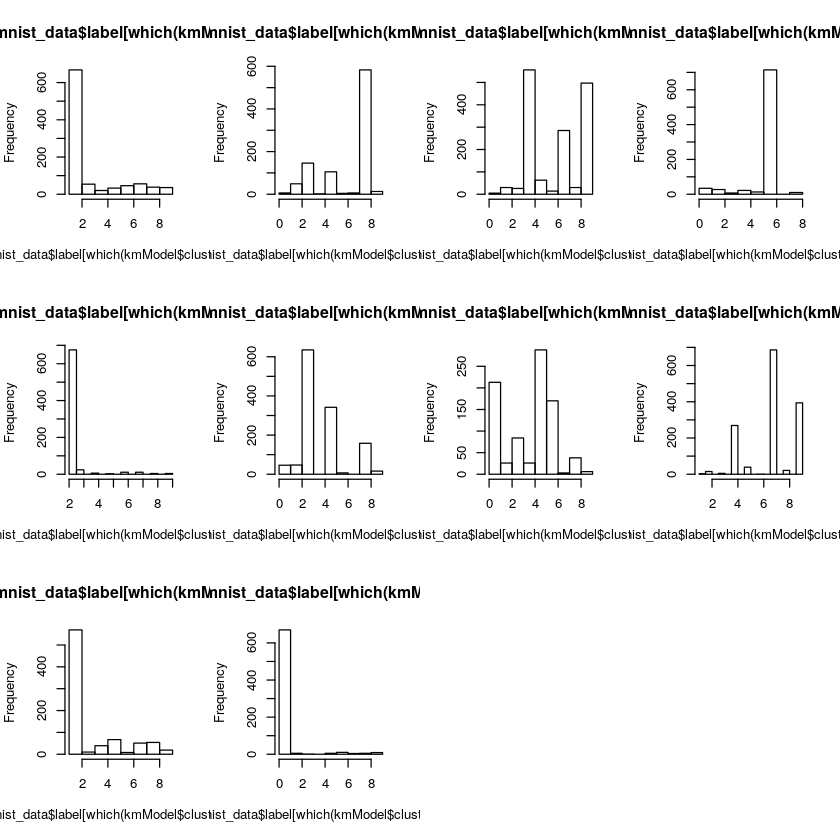

In [19]:
# Reading dataset
mnist_data <- read_csv("MNIST_train.csv")
nrows <- 10000
indSample <- sample(dim(mnist_data)[1], nrows, replace = FALSE)
mnist_data <- mnist_data[indSample,]

kmModel<-kmeans(mnist_data[,-1], centers=10, nstart=1)
# Evaluatin the discrimination:
par(mfrow=c(3,4))
for (i in 1:10){
  hist(mnist_data$label[which(kmModel$cluster == i)])
}

Los histogramas reflejan ciertas cifras que se discriminan correctamentem si bien en otros clusters existe una mayor disparidad. Veamos los centroides asociados a cada cluster a ver si se corresponden con la cifra reflejada en el histograma.

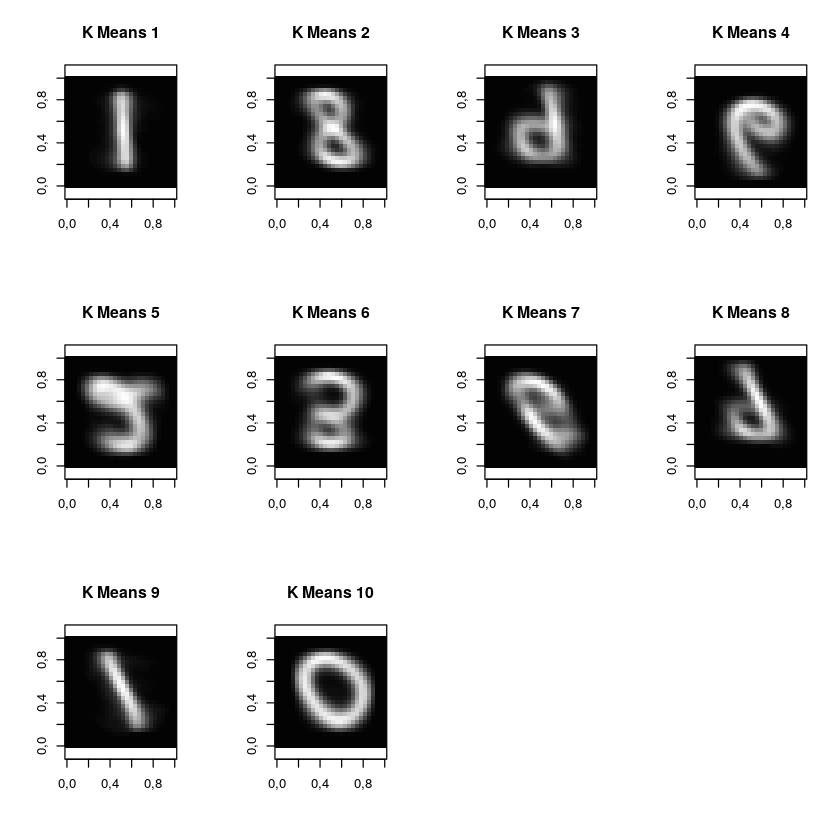

In [20]:
# Building a 3*3 grid
par(mfrow=c(3,4))
for (i in 1:10){
  # Changing i-th center to matrix
  mat <- matrix(as.numeric(kmModel$centers[i,]), nrow = 28, ncol=28, byrow = FALSE)
  # plot
  image(mat, main=paste0("K Means ", i), col=paste("gray", 1:99,sep=""), asp = 1)
}

Como se ve en la imagen, el orden de los clústeres no se corresponde, o no tiene porque hacerlo, con el de las cifras, surgiendo una primera pregunta, ¿qué cifra asignamos a cada cluster? Por otro lado, ¿quedan todas las cifras clasificadas a través del clustering?

Uno de los parámetros que podríamos ajustar es el número de iteraciones del algoritmo. Observando el resultado obtenido anteriormente, ¿qué ocurre al incrementar el número de iteraciones? ¿permite conseguir una mejor discriminación de las 10 cifras?

¿Qué ocurre con los centroides?

¿Tiene sentido aplicar otros métodos de clustering de los vistos? (Gaussian Mixtures sufren mucho con la dimensionalidad del problema de modo que es preferible, de usarlo, aplicar previamente PCs u otro método de reducción de la dimensión de los datos).

In [21]:
cmModel <- cmeans(mnist_data[,-1], 10, iter.max = 1000)

Compara las matrices de confusión de ambos métodos de segmentación entendidos como método de clasificación, ¿las conclusiones obtenidas son coherentes con las derivadas de los histogramas?

### 4.2.2 Práctica: Weather typping - Técnicas de segmentación

En primer lugar consideraremos los tipos de tiempo para identificar patrones atmosféricos asociados a diferentes momentos del año y a regímenes de precipitación característicos.

Las variables del modelo atmosférico (predictores) serán el Geopotencial, la temperatura del aire, la humedad específica y la presión a nivel del mar en un dominio sobre la Península Ibérica para el periodo 1979-2008. La variable x contiene las variables del modelo.

In [22]:
## load data
# Predictors: Z500,T850,T700,T500,2T,Q850,Q500,SLP
load("meteo.RData")
longitud <- seq(-10,4,2) #con un paso de 2º
latitud <- seq(36,44,2) #con un paso de 2º
years <- 1979:2008
# Predictand: precipitation in Lisboa.
location <- c(-9.15,38.7)

head(x[,161:200])

"290,7835","289,5565","287,8314","287,2303","286,3021","290,5018","286,4886","283,9901","281,9861","284,7830",⋯,"286,7977","289,8411","288,6009","279,4481","277,1590","286,4188","289,8992","288,1219","285,2000","277,4315"
"290,2500","288,8427","287,2612","286,7109","285,8266","290,7212","288,0005","282,5439","281,6303","284,2895",⋯,"284,2173","286,2417","282,4341","271,3701","268,9106","282,4155","285,2939","280,4936","276,9458","269,0932"
"290,3589","289,3428","288,3799","287,4277","286,1494","290,4751","287,0767","284,0352","282,3315","285,2529",⋯,"280,7388","284,9424","282,4751","270,4648","269,8403","277,4736","283,8164","281,2271","278,6865","270,2935"
"287,6400","286,9755","286,1410","285,4237","284,8251","287,7987","284,0648","281,9540","280,6933","284,4364",⋯,"284,4281","288,1005","286,9008","278,1142","275,6410","283,2714","288,4672","286,7260","284,3656","275,0331"
"287,2379","286,2013","285,2008","284,2926","283,4020","286,7907","282,0973","279,4040","277,4347","282,5500",⋯,"284,0143","288,0172","285,5973","276,1344","277,3449","283,4713","288,4416","286,4948","283,7692","276,3615"
"288,2794","286,6042","286,1046","285,3532","284,9069","288,6159","282,4059","280,1422","277,3439","283,7209",⋯,"285,4503","288,0700","285,1335","279,4074","276,7423","286,5729","288,5299","285,8776","283,9552","276,4845"


Consideraremos en primer lugar un único punto del modelo y la variable de temperatura del aire. Las estaciones del año oficiales para el hemisferio boreal según la organización meteorológica mundial (WMO) son la siguientes:

-    Invierno: diciembre, enero, febrero (DJF)
-    Primavera: marzo, abril, mayo (MAM)
-    Verano: junio, julio, agosto (JJA)
-    Otoño: septiembre, octubre, noviembre (SON)

In [23]:
## See, for example, ? seq.Date and ? months
fechas <- seq.Date(from = as.Date("1979/1/1"), to = as.Date("2008/12/31/"), by = "day")
meses <- months(fechas, abbreviate = T)
meses

[1] "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene"
   [13] "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene"
   [25] "ene" "ene" "ene" "ene" "ene" "ene" "ene" "feb" "feb" "feb" "feb" "feb"
   [37] "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb"
   [49] "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "mar"
   [61] "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar"
   [73] "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar"
   [85] "mar" "mar" "mar" "mar" "mar" "mar" "abr" "abr" "abr" "abr" "abr" "abr"
   [97] "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr"
  [109] "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr"
  [121] "may" "may" "may" "may" "may" "may" "may" "may" "may" "may" "may" "may"
  [133] "may" "may" "may" "may" "may" "may" "may" "may" "may" "may" "may" "may"
  [145] "may" "may" "may" "may" "may" "may" "may" "jun" "jun" "jun" "jun" "jun"
  [157] "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun"
  [169] "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun"
  [181] "jun" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul"
  [193] "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul"
  [205] "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "ago" "ago" "ago" "ago"
  [217] "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago"
  [229] "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago"
  [241] "ago" "ago" "ago" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep"
  [253] "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep"
  [265] "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "oct" "oct" "oct"
  [277] "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct"
  [289] "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct" "oct"
  [301] "oct" "oct" "oct" "oct" "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov"
  [313] "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov"
  [325] "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov" "nov" "dic" "dic"
  [337] "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic"
  [349] "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic" "dic"
  [361] "dic" "dic" "dic" "dic" "dic" "ene" "ene" "ene" "ene" "ene" "ene" "ene"
  [373] "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene"
  [385] "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene" "ene"
  [397] "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb"
  [409] "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb" "feb"
  [421] "feb" "feb" "feb" "feb" "feb" "mar" "mar" "mar" "mar" "mar" "mar" "mar"
  [433] "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar"
  [445] "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar" "mar"
  [457] "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr"
  [469] "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr" "abr"
  [481] "abr" "abr" "abr" "abr" "abr" "abr" "may" "may" "may" "may" "may" "may"
  [493] "may" "may" "may" "may" "may" "may" "may" "may" "may" "may" "may" "may"
  [505] "may" "may" "may" "may" "may" "may" "may" "may" "may" "may" "may" "may"
  [517] "may" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun"
  [529] "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jun"
  [541] "jun" "jun" "jun" "jun" "jun" "jun" "jun" "jul" "jul" "jul" "jul" "jul"
  [553] "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul"
  [565] "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jul"
  [577] "jul" "jul" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago"
  [589] "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago" "ago"
  [6

Sabiendo esto, realiza un agrupamiento de la serie de temperatura seleccionada considerando 4 clusters. A partir de los resultados obenidos responde a las siguientes preguntas:

-    ¿Qué sentido tiene la agrupación por valores de temperatura realizada?
-    ¿Para cada estación del año, cual es el porcentaje de datos correctamente agrupados?
-    ¿Cuáles son las estaciones del año con mayor tasa de error? Razona la respuesta.
-    ¿Cómo se comporta la precipitación en cada uno de los clústers obtenidos?

In [24]:
# Añado el mes a 'x' (llamo el nuevo objeto x2)
x2 <- as.data.frame(x)#[,162:201])
x2 <- as.data.frame(cbind(x2, meses))

In [25]:
head(x2)
class(x2$V1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V312,V313,V314,V315,V316,V317,V318,V319,V320,meses
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,"57042,96","56534,84","55884,40","55175,59","54458,21","56980,27","56460,59","55800,02","55051,15","54318,77",⋯,"101627,3","101357,2","101110,7","101291,0","101814,9","101479,4","101164,5","100970,7","100905,3",ene
2,"56963,20","56493,45","55930,82","55340,20","54768,63","56856,57","56361,95","55776,76","55164,26","54585,32",⋯,"102069,7","102204,5","102480,3","102858,8","101973,3","102033,3","102165,5","102323,9","102534,2",ene
3,"56522,59","55971,40","55304,34","54498,03","53725,15","56514,84","55977,71","55327,28","54569,78","53863,46",⋯,"102448,4","102438,3","102434,3","102339,8","102669,7","102565,5","102530,3","102453,6","102487,1",ene
4,"54627,98","53979,80","53494,05","53072,98","52616,36","54776,17","54089,05","53516,98","53012,86","52501,42",⋯,"100672,8","100360,7","100133,7","100028,4","101126,2","100700,0","100381,3","100118,3","100319,8",ene
5,"53584,38","53391,01","53310,38","53292,82","53340,13","53781,70","53498,13","53306,82","53213,26","53157,38",⋯,"100663,5","100747,7","100934,0","101015,8","100801,6","100685,3","100777,5","100909,4","101164,7",ene
6,"54221,86","54220,24","54328,55","54772,49","55251,11","54391,11","54345,93","54284,05","54525,99","55012,61",⋯,"101511,5","101798,9","102142,2","102368,5","101438,7","101440,9","101685,3","102030,7","102311,9",ene


[1] "numeric"

In [26]:
# Preparo el clustering

# Temperatura del aire en superficie (columnas 161:200),
km <- kmeans(x2[,161:200], 4, iter.max = 1000, nstart = 20)

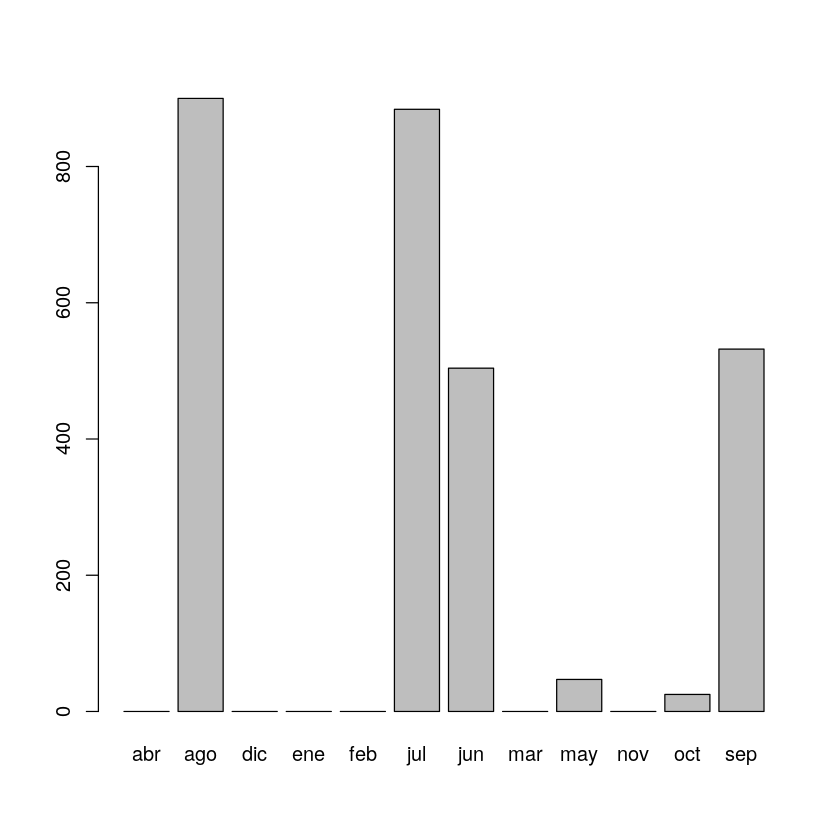

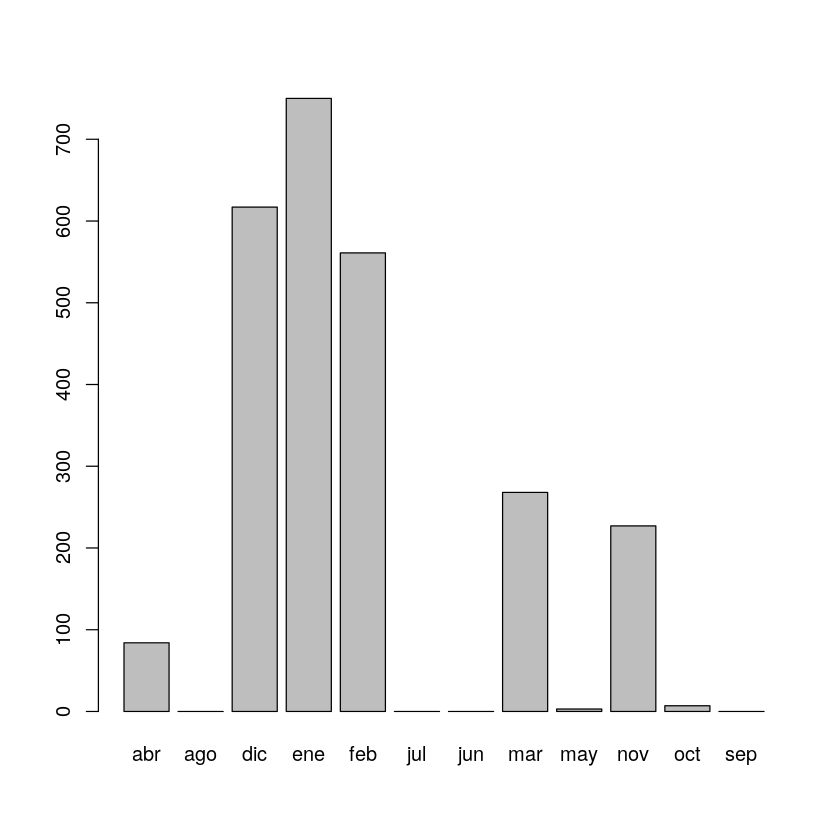

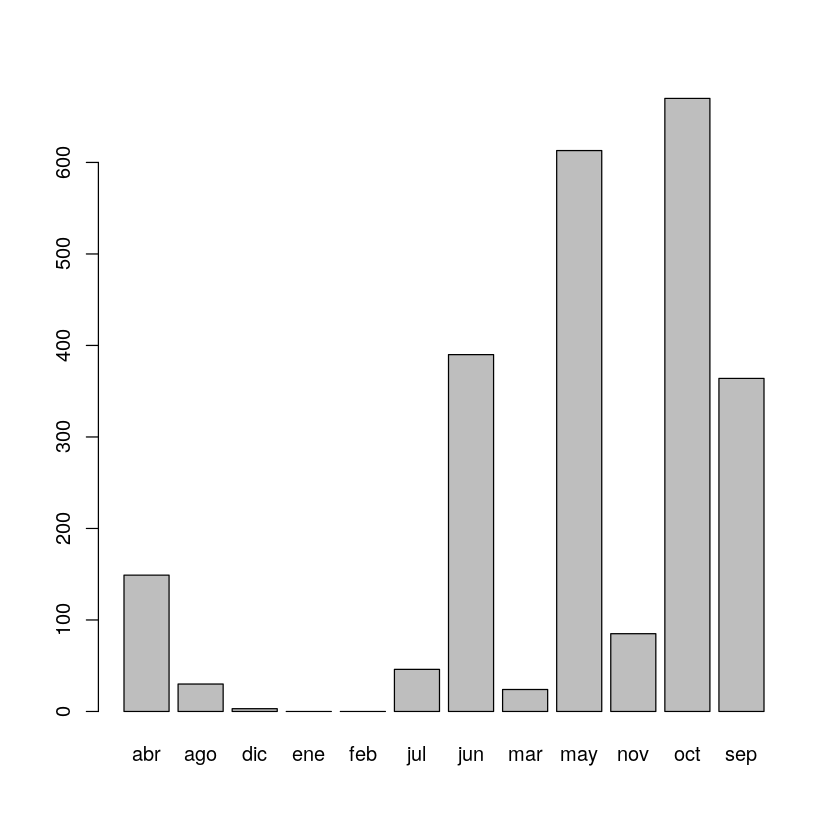

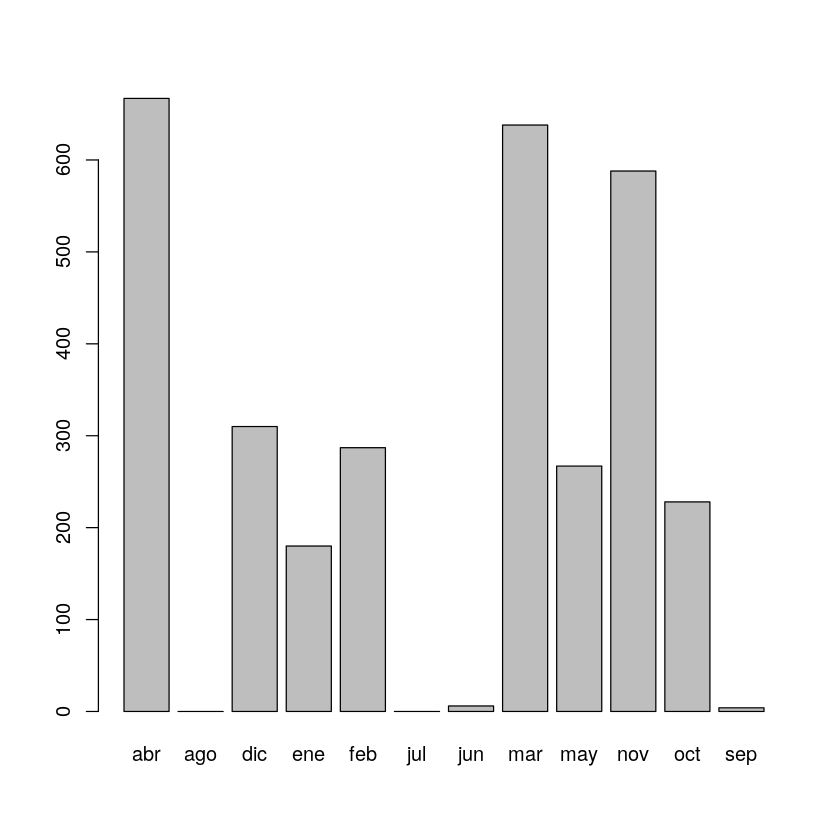

In [27]:
# Pinto los meses de cada Cluster

for (i in 1:4){
    plot(x2$meses[which(km$cluster == i)])    
}

#### ¿Qué sentido tiene la agrupación por valores de temperatura realizada?


Aunque sea mirando 'a ojo', se observa que los primeros dos clusters se pueden asociar a la estaciones:
  1. Verano (meses: junio, julio, agosto, septiembre);
  2. Invierno (meses: diciembre, enero, febrero y, en menor parte marzo, abril, noviembre);

Mientras que es mucho más complicado asociar los clusters 3 y 4 a una estación especifica, ya que en ambos casos muchos meses se ven representados y no está claro si el agrupamiento se puede relacionar con las estaciones.

Esto se debe a que el algoritmo no conoce la serie temporal, si no exclusivamente las temperaturas. <br>
Por eso, es relativamente sencillo asociar el cluster que agrupa los días con temperatura más alta a la estación verano, y los días con temperatura más baja al invierno, mientras que resulta más complejo sino imposible asociar los dos clusters que agrupan los días de temperaturas intermedias a primavera u otoño, ya que las dos estaciones pueden presentar días con temperaturas parecidas.

#### ¿Para cada estación del año, cual es el porcentaje de datos correctamente agrupados?

Como ya se ha comentado, no es trivial asociar a todos los clusters una estación de manera univoca. Podemos pensar que:
- Cluster 1 --> verano;
- Cluster 2 --> otoño;
- Cluster 3 --> primavera;
- Cluster 4 --> invierno.

Dicho esto, podemos pasar a contestar a la pregunta.

In [28]:
months <- c('ene','feb','mar','apr','may','jun','jul','ago','sep','oct','nov','dic')

In [29]:
# Número de días bien clasificados
all.yields <- c()
for (i in 1:4){
    tot.events.cluster <- length(x2$meses[km$cluster == i])
    yields <- c()
    for (mes in months){
        current.month <- x2$meses[km$cluster == i] == mes
        yields <- c(yields, length(current.month[current.month == TRUE]))
    }
    all.yields <- c(all.yields, yields)
}
verano <- sum(all.yields[6:8]) / sum(all.yields[1:12])
verano

otonyo <- (sum(all.yields[21:23])) / sum(all.yields[13:24])
otonyo

primavera <- (sum(all.yields[27:29])) / sum(all.yields[25:36])
primavera

invierno <- (sum(all.yields[37:38]) + all.yields[48]) / sum(all.yields[37:48])
invierno

[1] 0,791148

[1] 0,09617756

[1] 0,2862921

[1] 0,3098086

#### ¿Cuáles son las estaciones del año con mayor tasa de error? Razona la respuesta.

Como esperado, los días de invierno y verano están bien clasificados (en casi el 80% de los casos), mientras que para otoño y primavera la agrupación parece perder de sentido, ya que sólo la mitad de los eventos de otoño se clasifican bien, y en primavera se baja hasta el 36%.

Como dicho, esto se debe a que agrupar días por temperatura funciona bien para estaciones 'extremas' pero no para estaciones intermedias.

#### ¿Cómo se comporta la precipitación en cada uno de los clústers obtenidos?

In [30]:
# Lluvia promedia en cada cluster

stringa = c('Cluster 1: verano', 'Cluster 2: otonyo', 'Cluster 3: primavera', 'Cluster 4: invierno')

for (i in 1:4){
    rain.cluster <- mean(y[km$cluster == i])
    print(paste(stringa[i],rain.cluster,"mm"))
}

[1] "Cluster 1: verano 0,320262793914246 mm"
[1] "Cluster 2: otonyo 2,45435041716329 mm"
[1] "Cluster 3: primavera 2,04022746419545 mm"
[1] "Cluster 4: invierno 3,09896062992126 mm"


Realiza el mismo agrupamiento considerando la matriz de temperaturas sobre la Península Ibérica, ¿cómo cambian los resultados respecto a la clasificación anterior?

### Clustering mensual

Considerando ahora 12 clústers (~ clasificación mensual), refleja el ciclo anual de precipitación obtenido y compáralo com el ciclo anual observado, ¿existe una correspondencia entre ambas series?

In [31]:
# Preparo el clustering con 12 clusters

# Temperatura del aire en superficie (columnas 161:200),
km <- kmeans(x2[,161:200], 12, iter.max = 1000, nstart = 20)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 547900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 547900)”


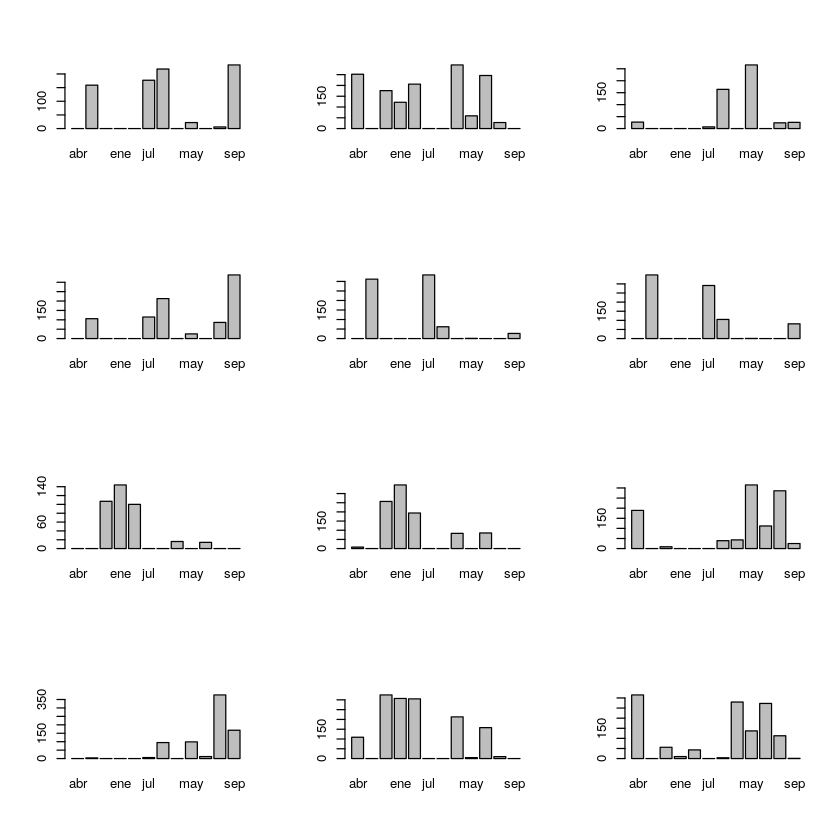

In [32]:
# Pinto los meses de cada Cluster
par(mfrow=c(4,3))

for (i in 1:12){
    plot(x2$meses[which(km$cluster == i)])    
}

Parece que utilizando un numero de clusters más grande, no somos capaces de agrupar por meses.

Al revés, se nota como haya varios clusters con 'poblaciones' de meses muy parecidas, o dicho de tra forma, simplemente hay varios clusters muy parecidos entre si.

Vamos a utilizar ahora las técnicas de clustering para realizar una predicción condicionada a tipos de tiempo, es decir a patrones atmosféricos característicos definidos como los centroides de un método de clustering.

Las variables del modelo atmosférico (predictores) serán el Geopotencial, la temperatura del aire, la humedad específica y la presión a nivel del mar en un dominio sobre la Península Ibérica para el periodo 1979-2008. La variable x contiene las variables del modelo.

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:cluster’:

    votes.repub


The following object is masked from ‘package:mclust’:

    map


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 


Attaching package: ‘class’


The following objects are masked from ‘package:FNN’:

    knn, knn.cv




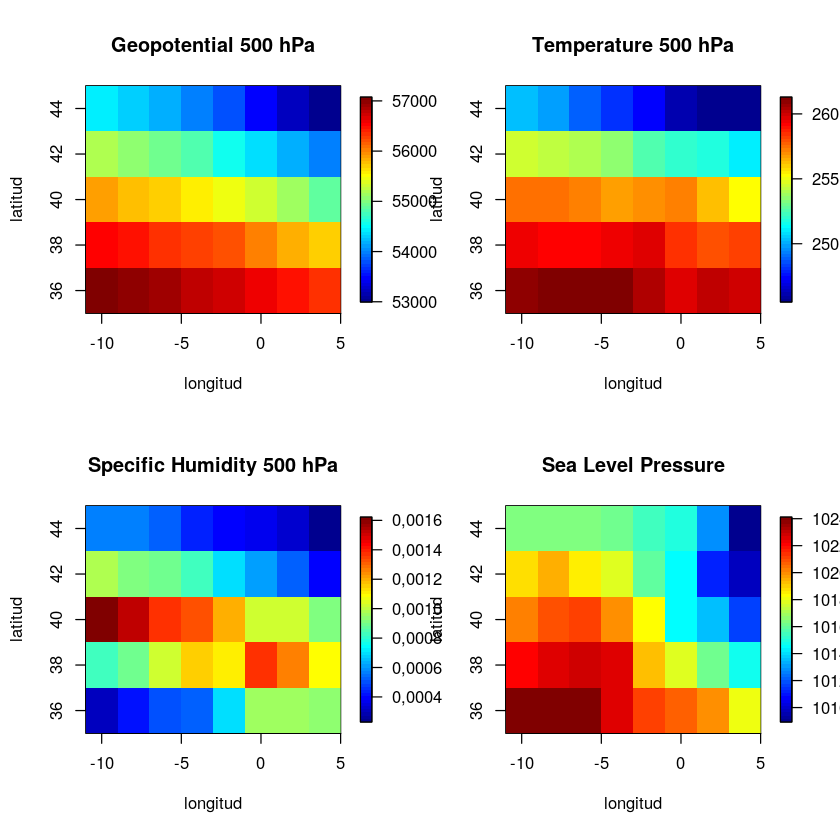

In [33]:
#install.packages(c('fields','FNN','class'))

library(fields)
library(FNN)
library(class)

par(mfrow=c(2,2))

image.plot(x = longitud, y = latitud, z = t(matrix(x[1,1:(length(longitud)*length(latitud))], nrow=length(latitud), ncol=length(longitud))), xlab = "longitud", ylab = "latitud", main = "Geopotential 500 hPa")
image.plot(x = longitud, y = latitud, z = t(matrix(x[1,121:(120+length(longitud)*length(latitud))], nrow=length(latitud), ncol=length(longitud))), xlab = "longitud", ylab = "latitud", main = "Temperature 500 hPa")
image.plot(x = longitud, y = latitud, z = t(matrix(x[1,241:(240+length(longitud)*length(latitud))], nrow=length(latitud), ncol=length(longitud))), xlab = "longitud", ylab = "latitud", main = "Specific Humidity 500 hPa")
image.plot(x = longitud, y = latitud, z = t(matrix(x[1,281:(280+length(longitud)*length(latitud))], nrow=length(latitud), ncol=length(longitud))), xlab = "longitud", ylab = "latitud", main = "Sea Level Pressure")

Por otra parte, trataremos de predecir la precipitación en Lisboa (-9.15, 38.7) para ese mismo periodo contenida en la variable y.

Como hemos visto, las variables predictoras estaban altamente correlacionadas y presentan rangos muy diferentes, de modo que podría ser útil aplicar PCAs sobre los datos rescalados. En esta ocasión no utilizaremos PCs, de modo que definamos las muestras de entrenamiento y test.

Consideraremos dos umbrales, 1 mm y 20 mm, de precipitación para diferenciar días de precipitación y días de precipitación intensa. Consideraremos el método KNN para realizar la clasificación, cuyo código podría ser algo así:

In [36]:
# train and test separation (75% and 25%, respectively)
indtrain = sort(sample(length(y), round(0.75*length(y))))

# 75% train
x.train = x[indtrain, ]
y.train = y[indtrain]

# 25% test
x.test = x[-indtrain, ]
y.test = y[-indtrain]

In [38]:
kmModel <- kmeans(x.train, 100, iter.max = 1000, nstart =20)

yCentroid <- knn.reg(train = x.train, test = kmModel$centers, y = y.train, k = 1)

# knn.reg application
pred <- knn.reg(train = kmModel$centers, test = x.test, y = yCentroid$pred, k = 1)

Realizar la predicción con y sin clustering, y analizar si las predicciones mejoran de forma global o si existe algún clustering para el cual se da una clara mejoría en la predicción. Incluir en la interpretación de los resultados, el coste computacional asociado a cada caso.

En líneas generales:

-    ¿cambian los resultados de validación al aplicar un clustering previamente?
-    ¿Hay clusters cuyas predicciones sean sensiblemente peores que el resto?, ¿y que el total?
-    ¿Se concentran las precipitaciones intensas/leves en alguno de los tipos de tiempo?, ¿se asocian los regímenes de precipitación con una mejor/peor predicción por parte del KNN?